In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Since we don't need "RowNumber", "CustomerId" and "Surname" for churn predition (whether customer will leave or continue. 1 means the customer will leave), so we will drop them. The column, "Exited" represents churn

In [5]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

We will check whether we have any missing value in the entire dataset

In [6]:
df.isna().values.any()

False

So we do not have any missing data in the dataset.

In [7]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

We must convert the datatype of columns, "Geography" and "Gender". Since we have three unique values for "Geography" so we will apply one-hot encoding for that. For "Gender" we will simply replace the values for Females and males with 0 and 1 

In [9]:
df2 = pd.get_dummies(data=df, columns=['Geography'], drop_first=True)
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [10]:
df2['Gender'].replace({'Female': 0, 'Male': 1}, inplace=True)
df2['Gender'].unique()

array([0, 1], dtype=int64)

In [11]:
df2.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany       bool
Geography_Spain         bool
dtype: object

### Scaling the dataset:

we will be scaling the columns, "CreditScore", "Tenure", "Balance", and "EstimatedSalary"

In [12]:
cols_to_scale = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,1,1,1,0.506735,1,False,False
1,0.516,0,0.310811,0.1,0.334031,1,0,1,0.562709,0,False,True
2,0.304,0,0.324324,0.8,0.636357,3,1,0,0.569654,1,False,False
3,0.698,0,0.283784,0.1,0.000000,2,0,0,0.469120,0,False,False
4,1.000,0,0.337838,0.2,0.500246,1,1,1,0.395400,0,False,True


In [14]:
print(df2['CreditScore'].head(3))
print()
print(df2['Tenure'].head(3))
print()
print(df2['Balance'].head(3)) 
print()
print(df2['EstimatedSalary'].head(3))

0    0.538
1    0.516
2    0.304
Name: CreditScore, dtype: float64

0    0.2
1    0.1
2    0.8
Name: Tenure, dtype: float64

0    0.000000
1    0.334031
2    0.636357
Name: Balance, dtype: float64

0    0.506735
1    0.562709
2    0.569654
Name: EstimatedSalary, dtype: float64


Creating a csv file for cleaned dataset:

In [15]:
df2.to_csv('../data/Churn_Modelling_Cleaned.csv', index=False)

### Analytics:

In [16]:
tenure_with_exited_no = df[df['Exited'] == 0].Tenure 

tenure_with_exited_Yes = df[df['Exited'] == 1].Tenure

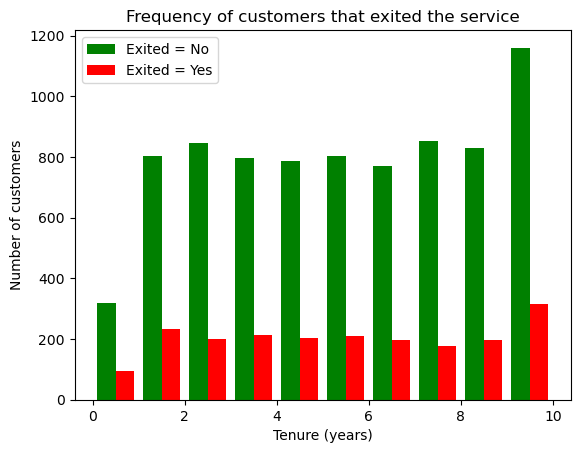

In [17]:
plt.xlabel("Tenure (years)")
plt.ylabel("Number of customers")
plt.title("Frequency of customers that exited the service")
plt.hist([tenure_with_exited_no, tenure_with_exited_Yes], color=['green', 'red'], label=['Exited = No', 'Exited = Yes'])
plt.legend()

Long-tenured customers might be more prone to exit at the end of a typical contract period

In [18]:
cr_score_with_exited_no = df[df['Exited'] == 0].CreditScore 

cr_score_with_exited_Yes = df[df['Exited'] == 1].CreditScore

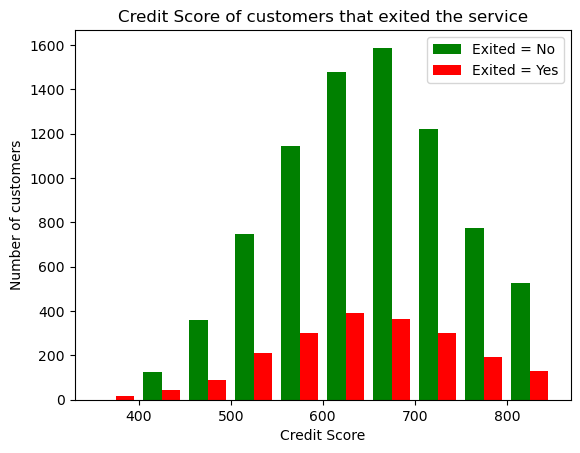

In [19]:
plt.xlabel("Credit Score")
plt.ylabel("Number of customers")
plt.title("Credit Score of customers that exited the service")
plt.hist([cr_score_with_exited_no, cr_score_with_exited_Yes], color=['green', 'red'], label=['Exited = No', 'Exited = Yes'])
plt.legend()

Customers with low credit scores may face financial difficulties, while higher-score customers may leave due to better offers elsewhere

In [20]:
balance_with_exited_no = df[df['Exited'] == 0].Balance 

balance_with_exited_Yes = df[df['Exited'] == 1].Balance

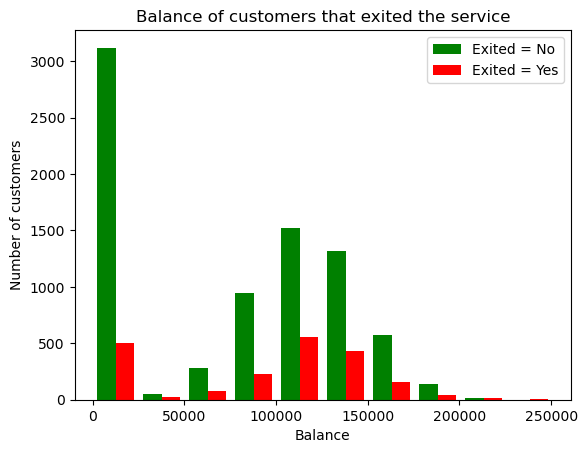

In [21]:
plt.xlabel("Balance")
plt.ylabel("Number of customers")
plt.title("Balance of customers that exited the service")
plt.hist([balance_with_exited_no, balance_with_exited_Yes], color=['green', 'red'], label=['Exited = No', 'Exited = Yes'])
plt.legend()

Customers with a zero balance are less engaged but still retained, while higher-balance customers may leave for better financial opportunities or service issues.

In [22]:
estimated_salary_with_exited_no = df[df['Exited'] == 0].EstimatedSalary 

estimated_salary_with_exited_Yes = df[df['Exited'] == 1].EstimatedSalary

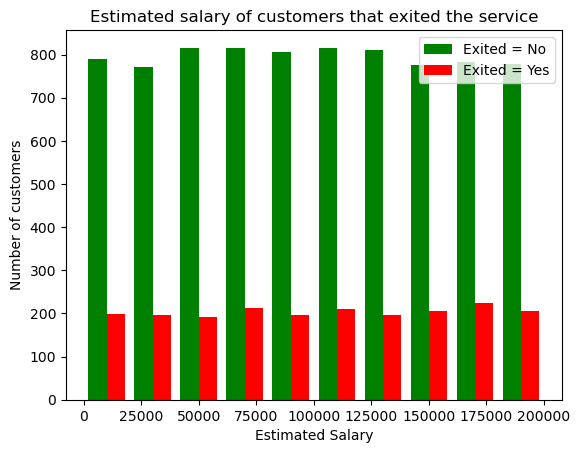

In [23]:
plt.xlabel("Estimated Salary")
plt.ylabel("Number of customers")
plt.title("Estimated salary of customers that exited the service")
plt.hist([estimated_salary_with_exited_no, estimated_salary_with_exited_Yes], color=['green', 'red'], label=['Exited = No', 'Exited = Yes'])
plt.legend()

There is insignificant difference in number of customers leaving the service while considering the estimated salary.

In [24]:
age_with_exited_no = df[df['Exited'] == 0].Age 

age_with_exited_Yes = df[df['Exited'] == 1].Age

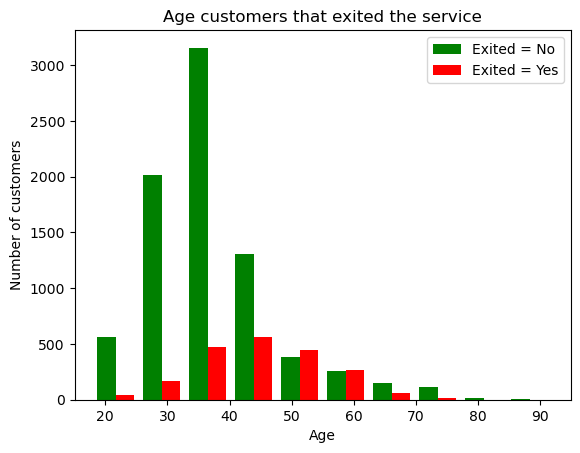

In [25]:
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.title("Age customers that exited the service")
plt.hist([age_with_exited_no, age_with_exited_Yes], color=['green', 'red'], label=['Exited = No', 'Exited = Yes'])
plt.legend()

Customers with ages 35 to 60  seem to be more prone to exiting the service.